<a href="https://colab.research.google.com/github/Bhuvi237/Task-6-Irist-dataset/blob/main/Iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from matplotlib.colors import ListedColormap

In [25]:
# Load Dataset
iris = pd.read_csv('/content/Iris.csv')

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.shape

(150, 6)

In [8]:
iris.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [5]:
x=iris.drop('Species',axis=1)
y=iris['Species']

In [6]:
print(x)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      1            5.1           3.5            1.4           0.2
1      2            4.9           3.0            1.4           0.2
2      3            4.7           3.2            1.3           0.2
3      4            4.6           3.1            1.5           0.2
4      5            5.0           3.6            1.4           0.2
..   ...            ...           ...            ...           ...
145  146            6.7           3.0            5.2           2.3
146  147            6.3           2.5            5.0           1.9
147  148            6.5           3.0            5.2           2.0
148  149            6.2           3.4            5.4           2.3
149  150            5.9           3.0            5.1           1.8

[150 rows x 5 columns]


In [7]:
print(y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object


In [27]:
# Normalize features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [28]:
# Train-test split
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [29]:
# Try different K values
k_values = [1, 3, 5, 7, 9]
results = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    results[k] = acc
    print(f"\nK = {k}")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


K = 1
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


K = 3
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00      

In [30]:
# Best K
best_k = k_values[np.argmax(results)]
print(f"Best K value: {best_k}, Accuracy: {max(results):.4f}")

Best K value: 1, Accuracy: 9.0000


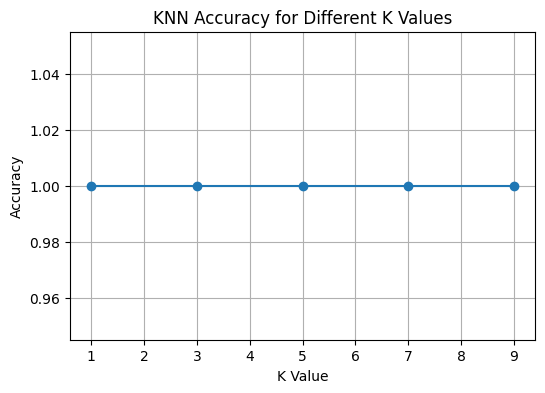

In [31]:
plt.figure(figsize=(6,4))
plt.plot(list(results.keys()), list(results.values()), marker='o')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different K Values')
plt.grid(True)
plt.show()

In [32]:
# Visualize decision boundaries
x_2D = x_scaled[:, :2]
x_train_2D, x_test_2D, y_train_2D, y_test_2D = train_test_split(x_2D, y, test_size=0.2, random_state=42)

In [33]:
# Train final model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_2D, y_train_2D)

KNeighborsClassifier()

In [34]:
# Create meshgrid
x_min, x_max = x_2D[:, 0].min() - 1, x_2D[:, 0].max() + 1
y_min, y_max = x_2D[:, 1].min() - 1, x_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),np.arange(y_min, y_max, 0.02))


In [35]:
# Predict for each point in meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [36]:
# Plot decision boundary
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']

In [37]:
# Map class names to numbers
class_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.array([class_mapping[label] for label in Z])
Z = Z.reshape(xx.shape)

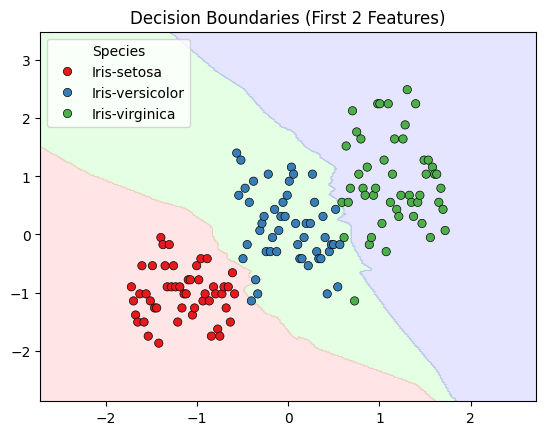

In [39]:
# plot of decision boundaries for first 2 features
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF']))
sns.scatterplot(x=x_2D[:, 0], y=x_2D[:, 1], hue=y, palette="Set1", edgecolor="k")
plt.title("Decision Boundaries (First 2 Features)")
plt.show()